# Your Name: Rana-Roop Singh Bhullar

CA03_Decision_Trees_Rana_Roop_Bhullar

In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
  #package for endocing
from sklearn.preprocessing import LabelEncoder
  #package for building model 
from sklearn.tree import DecisionTreeClassifier
  #packages for visualization
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
  #packages for model evaluation 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
# Read the data from the given URL
url = "https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true"
census_data = pd.read_csv(url, encoding = "ISO-8859-1")

# Part 1

1.1 Data Quality Analysis

In [4]:
#Insights in our data
census_data.head()
census_data.tail()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


In [5]:
#Descriptive Statistics
census_data.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
#Identify the total rows and columns
census_data.shape

(48842, 11)

In [10]:
# Do we see any null values?
census_data.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [12]:
#Display range, columns, non-null values, datatype and memory info
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


There are 7 explanatory variables:
1. Age (5 bins)
2. Capital Gain / Loss (3 bins) 
3. Education (5 bins)
4. Hours per Week (5 bins)
5. Marriage Status and Relationship (3 bins)
6. Occupation (5 bins)
7. Race And Sex (3 bins)

In [30]:
#Age bin analysis. Finding the values prior to visualization. Insert into crosstab for easier visualization
agecrosstab = pd.crosstab(index = census_data.age_bin, columns = census_data.y, normalize = 'index')
agecrosstab

y,0,1
age_bin,,
a. 0-25,0.982445,0.017555
b. 26-30 & 71-100,0.861388,0.138612
c. 31-35 & 61-70,0.757292,0.242708
d. 36-40 & 56-60,0.668982,0.331018
e. 40-55,0.618062,0.381938


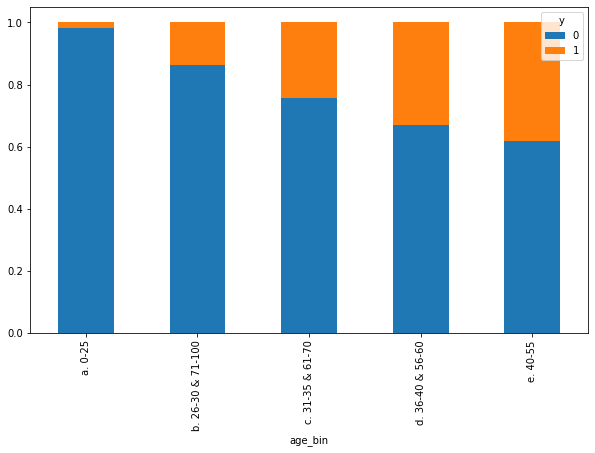

In [31]:
# Analysis of Age Bin (5 bins)
agecrosstab = pd.crosstab(index = census_data.age_bin, columns = census_data.y, normalize = 'index')
agecrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

In [32]:
#Capital gain analysis. Insert into crosstab for easier data visualization.
capitalgaincrosstab = pd.crosstab(index = census_data.capital_gl_bin, columns = census_data.y, normalize = 'index')
capitalgaincrosstab

y,0,1
capital_gl_bin,,
a. = 0,0.810653,0.189347
b. < 0,0.498685,0.501315
c. > 0,0.382652,0.617348


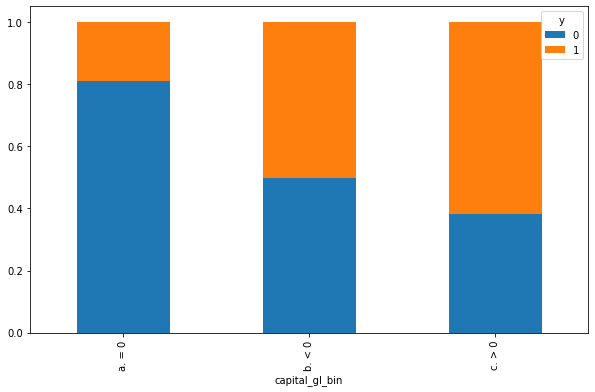

In [17]:
# Analysis of Capital Gain (3 bins)
capitalgaincrosstab = pd.crosstab(index = census_data.capital_gl_bin, columns = census_data.y, normalize = 'index')
capitalgaincrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

In [34]:
#Eduaction bin analysis. Insert into crosstab for easier visualization.
educationcrosstab = pd.crosstab(index = census_data.education_bin, columns = census_data.y, normalize = 'index')
educationcrosstab

y,0,1
education_bin,,
a. Low,0.942884,0.057116
b. Mid,0.818593,0.181407
c. Bachelors,0.587165,0.412835
d. Masters,0.450884,0.549116
e. High,0.266106,0.733894


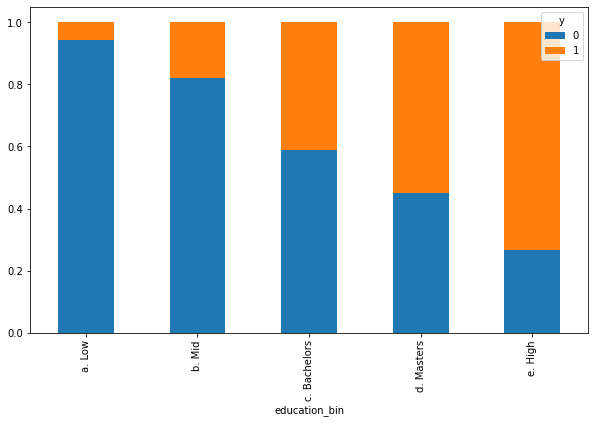

In [18]:
#Analysis of Education Bin (5 bins)
educationcrosstab = pd.crosstab(index = census_data.education_bin, columns = census_data.y,  normalize = 'index')
educationcrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

In [35]:
# Analysis of Hours Per Week Bin. Insert into crosstab for easier visualization.
hourscrosstab = pd.crosstab(index = census_data.hours_per_week_bin, columns = census_data.y, normalize = 'index')
hourscrosstab

y,0,1
hours_per_week_bin,,
a. 0-30,0.933002,0.066998
b. 31-40,0.796576,0.203424
c. 71-100,0.655039,0.344961
d. 41-50 & 61-70,0.607801,0.392199
e. 51-60,0.567970,0.432030


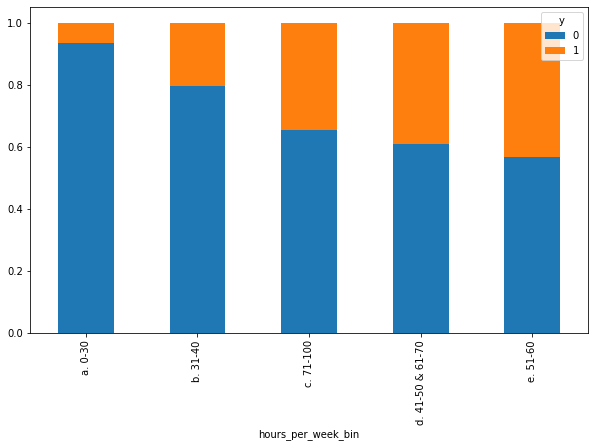

In [19]:
# Analysis of Hours Per Week Bin (5 bins)
hourscrosstab = pd.crosstab(index = census_data.hours_per_week_bin, columns = census_data.y, normalize = 'index')
hourscrosstab.plot(kind='bar', stacked=True, figsize = (10,6))


In [36]:
#Analysis of Marriage Status and Relationship Bin. Insert into crosstab for easiler visualization
msrcrosstab = pd.crosstab(index = census_data.msr_bin, columns = census_data.y, normalize = 'index')
msrcrosstab

y,0,1
msr_bin,,
a. Low,0.983893,0.016107
b. Mid,0.900933,0.099067
c. High,0.549190,0.450810


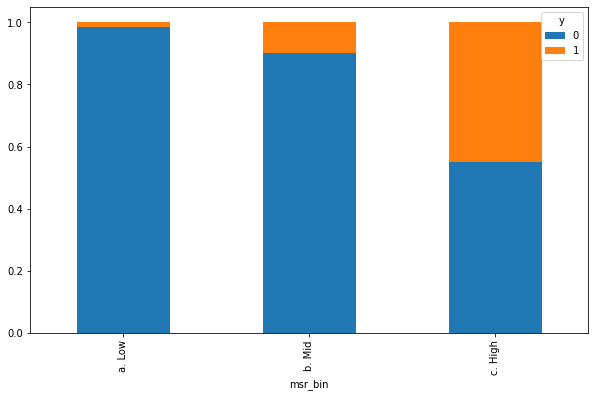

In [24]:
# Analysis of Marriage Status and Relationship Bin (3 bins)
msrcrosstab = pd.crosstab(index = census_data.msr_bin, columns = census_data.y, normalize = 'index')
msrcrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

In [37]:
occupationcrosstab = pd.crosstab(index = census_data.occupation_bin, columns = census_data.y, normalize = 'index')
occupationcrosstab

y,0,1
occupation_bin,,
a. Low,0.952328,0.047672
b. Mid - Low,0.877732,0.122268
c. Mid - Mid,0.761005,0.238995
d. Mid - High,0.700288,0.299712
e. High,0.535650,0.464350


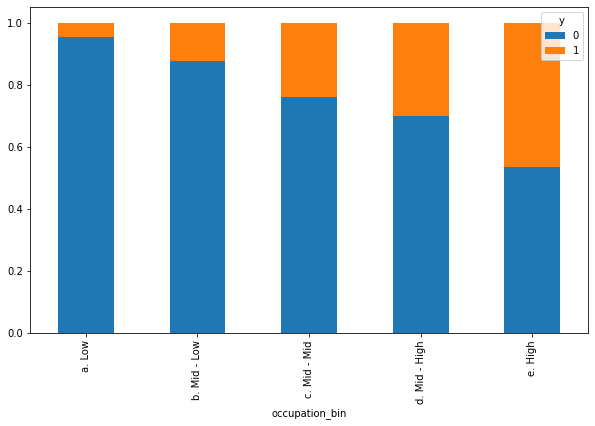

In [38]:
# Analysis of Occupation Bin (5 bins)
occupationcrosstab = pd.crosstab(index = census_data.occupation_bin, columns = census_data.y, normalize = 'index')
occupationcrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

In [39]:
#Analysis of Race and Sex. Insert into crosstab for easier visualization
racesexcrosstab = pd.crosstab(index = census_data.race_sex_bin, columns = census_data.y, normalize = 'index')
racesexcrosstab

y,0,1
race_sex_bin,,
a. Low,0.940332,0.059668
b. Mid,0.870936,0.129064
c. High,0.683727,0.316273


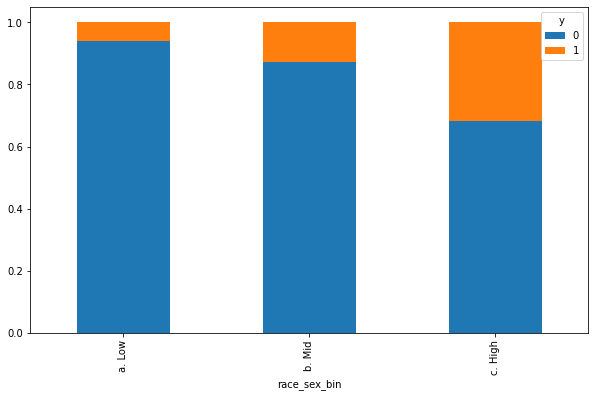

In [40]:
# Analysis of Race and Sex (3 bins)
racesexcrosstab = pd.crosstab(index = census_data.race_sex_bin, columns = census_data.y, normalize = 'index')
racesexcrosstab.plot(kind='bar', stacked=True, figsize = (10,6))

# Part 2

3. Build Decision Tree Classifier Models

In [ ]:
# Used this link for tips and help on scikit.learn decision tree 'https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart'

In [23]:
#Import Package to build Decision Tree model
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve

In [45]:
#Look at the info of our data
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [48]:
# We are able to see that the "Dtype" shows "object". We want to transform them to "type=category" which will enable us to encode them in upcoming steps
for column in ['hours_per_week_bin','occupation_bin','msr_bin', 
      'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 
      'education_bin', 'workclass_bin','age_bin']:
    census_data[column] = census_data[column].astype('category')

In [49]:
#Check to see the updated data if "Dtype" has been transformed from"object" to "category"
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   hours_per_week_bin  48842 non-null  category
 1   occupation_bin      48842 non-null  category
 2   msr_bin             48842 non-null  category
 3   capital_gl_bin      48842 non-null  category
 4   race_sex_bin        48842 non-null  category
 5   education_num_bin   48842 non-null  category
 6   education_bin       48842 non-null  category
 7   workclass_bin       48842 non-null  category
 8   age_bin             48842 non-null  category
 9   flag                48842 non-null  object  
 10  y                   48842 non-null  int64   
dtypes: category(9), int64(1), object(1)
memory usage: 1.2+ MB


In [51]:
# Change the values in the data to integers. 
# With the help of Label_encoder, we change them into integers.
census_data[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']]= census_data[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']].apply(LabelEncoder().fit_transform)  

In [52]:
#Confirm that Label_encoder is working and that we get an output that shows integers.
census_data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,1,1,2,2,2,2,1,3,train,0
1,0,4,2,0,2,2,2,1,4,train,0
2,1,0,1,0,2,1,1,1,3,train,0
3,1,0,2,0,1,0,0,1,4,train,0
4,1,4,2,0,0,2,2,1,1,train,0


In [57]:
# Split the data into train set and check the head & tail
train_set = census_data[census_data['flag'] == 'train']

train_set.head()
train_set.tail()


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32556,1,3,2,0,1,1,1,1,1,train,0
32557,1,1,2,0,2,1,1,1,3,train,1
32558,1,1,1,0,1,1,1,1,3,train,0
32559,0,1,0,0,2,1,1,1,0,train,0
32560,1,4,2,2,1,1,1,1,4,train,1


In [58]:
# Split the data into test set and check the head & tail

test_set = census_data[census_data['flag'] == 'test']

test_set.head()
test_set.tail()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48837,1,4,1,0,1,2,2,1,3,test,0
48838,1,1,0,0,1,1,1,0,2,test,0
48839,3,4,2,0,2,2,2,1,3,test,0
48840,1,1,0,2,2,2,2,1,4,test,0
48841,4,4,2,0,2,2,2,1,2,test,1


In [59]:
#By observing our results, we understand that the "flag" column is not needed. We can drop the column
#Drop for train_set
train_set.drop(columns='flag', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
#Confirm
train_set.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,y
0,1,1,1,2,2,2,2,1,3,0
1,0,4,2,0,2,2,2,1,4,0
2,1,0,1,0,2,1,1,1,3,0
3,1,0,2,0,1,0,0,1,4,0
4,1,4,2,0,0,2,2,1,1,0


In [62]:
#Drop for test_set
test_set.drop(columns='flag', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
#Confirm
test_set.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,y
32561,1,1,0,0,1,0,0,1,0,0
32562,3,1,2,0,2,1,1,1,3,0
32563,1,3,2,0,2,1,1,1,1,1
32564,1,1,2,2,1,1,1,1,4,1
32565,0,1,0,0,1,1,1,0,0,0


In [64]:
#Insert train variables to "train" our model. 
#Need to insert dependent(y) and independent(x) variable
y_train_set = train_set['y']
x_train_set = train_set.drop('y', axis=1)

In [65]:
#Insert test variables to "test" our model. These vairables will allow us to be able to see the accuracy of the model

y_test_set = test_set['y']
x_test_set = test_set.drop('y', axis=1)

In [68]:
# We can build our model.
#To build our Decision Tree Claissier Model, we have to insert a random state 
#to ensure randomness after we run it a couple of times

dtree = DecisionTreeClassifier(max_depth = 3, 
                               random_state = 101, 
                               max_features = None, 
                               min_samples_leaf = 15)
dtree.fit(x_train_set, y_train_set)
y_pred = dtree.predict(x_test_set)

#Vizualize The Decision Tree using GraphViz

In [ ]:
# Details on the steps from this link: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

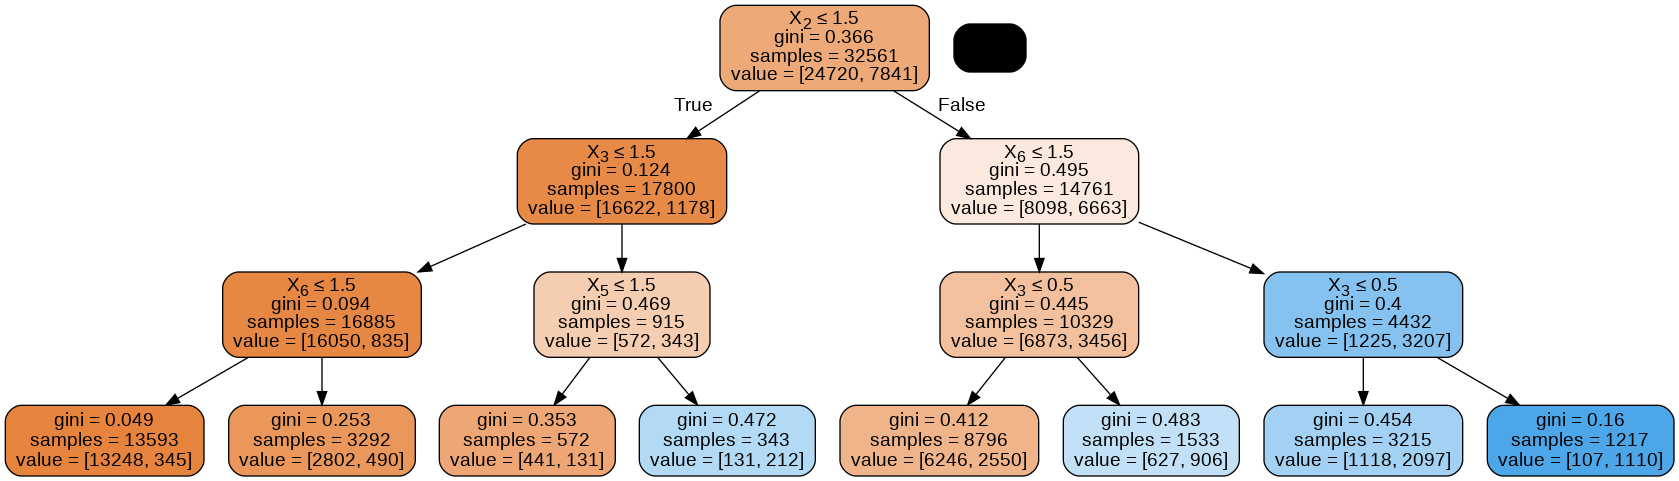

In [69]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Evaluate Decision Tree Performance

## Calculate and display the following. Do all of these inside your Notebook

• Confusion Matrix (TP, TN, FP, FN ... etc.) 

• Accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph) 


In [73]:
#importing packages for evaluation for decision tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [74]:
#Confusion Matrix to identify true positives, false positives etc, true negatives, false negatives

census_data_conf = confusion_matrix(y_test_set,y_pred)

In [75]:
#Print the Confusion Matrix
print(census_data_conf)

[[11456   979]
 [ 1743  2103]]


In [76]:
#Accuracy Score
print('Accuracy Score', accuracy_score(y_test_set, y_pred))

Accuracy Score 0.8328112523800749


In [77]:
#Print classification report for Precision, Recall, F1 Score.
print(classification_report(y_test_set, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     12435
           1       0.68      0.55      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.73      0.75     16281
weighted avg       0.82      0.83      0.83     16281



In [78]:
#Print AUC Score
print('AUC', roc_auc_score(y_test_set, y_pred))

AUC 0.7340362396160501


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show>

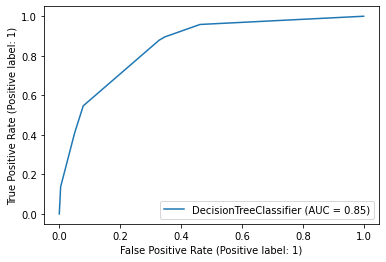

In [79]:
#Visualization of the Receiver Operating Characteristic Curve
roc_visual = plot_roc_curve(dtree, x_test_set, y_test_set)
plt.show

# Tune Decision Tree Performance And Automation of Performance Tuning

In [105]:
#Tree Tuning Case

tree_tuning1 = pd.read_csv('/content/Tree Tuning Cases.csv')
tree_tuning1

,Split Criteria (Entropy or Gini),Minimum Sample Split,Minimum Sample Leaf,Maximum Depth,Accuracy,Recall,Precision,F1 Score
0,entropy,2,4,2,Nan,Nan,Nan,Nan
1,entropy,2,3,6,Nan,Nan,Nan,Nan
2,entropy,2,7,5,Nan,Nan,Nan,Nan
3,entropy,6,9,6,Nan,Nan,Nan,Nan
4,gini,2,2,2,Nan,Nan,Nan,Nan
5,gini,8,5,3,Nan,Nan,Nan,Nan
6,gini,19,3,100,Nan,Nan,Nan,Nan
7,gini,20,30,16,Nan,Nan,Nan,Nan


In [109]:
#Function that will make values be automatically filled in.

accuracy_table=[]
recall_table=[]
precision_table=[]
f1_table=[]

for x in range(0,8):
    dtree_hyper = DecisionTreeClassifier(
        min_samples_split = tree_tuning1.iloc[x,1],
        min_samples_leaf = tree_tuning1.iloc[x,2],
        max_depth = tree_tuning1.iloc[x,3],
        random_state = 101,
        max_features = None,
        criterion = tree_tuning1.iloc[x,0])
    
    accuracy_table.append(accuracy_score(y_test_set, y_pred))
    recall_table.append(recall_score(y_test_set, y_pred))
    precision_table.append(precision_score(y_test_set, y_pred))
    f1_table.append(f1_score(y_test_set, y_pred)) 
    


    dtree_hyper.fit(x_train_set, y_train_set)
    y_pred=dtree_hyper.predict(x_test_set)
    
  

    tree_tuning1.iloc[x,4]=accuracy_table[0]
    tree_tuning1.iloc[x,5]=recall_table[0]
    tree_tuning1.iloc[x,6]=precision_table[0]
    tree_tuning1.iloc[x,7]=f1_table[0]


In [110]:
tree_tuning1

,Split Criteria (Entropy or Gini),Minimum Sample Split,Minimum Sample Leaf,Maximum Depth,Accuracy,Recall,Precision,F1 Score
0,entropy,2,4,2,0.843069,0.563963,0.711848,0.629334
1,entropy,2,3,6,0.843069,0.563963,0.711848,0.629334
2,entropy,2,7,5,0.843069,0.563963,0.711848,0.629334
3,entropy,6,9,6,0.843069,0.563963,0.711848,0.629334
4,gini,2,2,2,0.843069,0.563963,0.711848,0.629334
5,gini,8,5,3,0.843069,0.563963,0.711848,0.629334
6,gini,19,3,100,0.843069,0.563963,0.711848,0.629334
7,gini,20,30,16,0.843069,0.563963,0.711848,0.629334


# Prediction using your "trained" Decision Tree Model

PERFORMING TREE. Now make prediction of a “new” individual’s Income Category ( <=50K, or >50K ) with the following information. Do this in your Notebook.

• Hours Worked per Week = 48

• Occupation Category = Mid - Low

• Marriage Status & Relationships = High

• Capital Gain = Yes

• Race-Sex Group = Mid

• Number of Years of Education = 12

• Education Category = High

• Work Class = Income

• Age = 58

In [ ]:
# Create a new dataframe to make predictions from the trained Decision Tree Model

In [130]:
#Create a new record
data_rec1 = {'hours_per_week_bin':'d. 40-50 & 60-70', 'occupation_bin':'b. Mid-Low' , 'msr_bin':'c. High',
              'capital_gl_bin':'c. > 0','race_sex_bin':'b. Mid',
              'education_num_bin':'b. 8-12', 'education_bin':'e. High',
              'workclass_bin':'b. income','age_bin':'d. 32-40 & 54-60'}

In [131]:
data_rec1

{'age_bin': 'd. 32-40 & 54-60',
 'capital_gl_bin': 'c. > 0',
 'education_bin': 'e. High',
 'education_num_bin': 'b. 8-12',
 'hours_per_week_bin': 'd. 40-50 & 60-70',
 'msr_bin': 'c. High',
 'occupation_bin': 'b. Mid-Low',
 'race_sex_bin': 'b. Mid',
 'workclass_bin': 'b. income'}

In [133]:
# Turning it into a dataframe
data_rec_df1 = pd.DataFrame(data = data_rec1, index=[0])

In [134]:
data_rec_df1

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,d. 40-50 & 60-70,b. Mid-Low,c. High,c. > 0,b. Mid,b. 8-12,e. High,b. income,d. 32-40 & 54-60


In [135]:
#Use the best model to run prediction

dtree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split= 4,max_depth= 6, min_samples_leaf=5, random_state = 20, max_features=None)

dtree.fit(x_train_set, y_train_set)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       min_samples_split=4, random_state=20)

In [136]:
y_pred = dtree.predict(data_rec_df1)

ValueError: ignored

In [ ]:
#Not able to run my last codes in order to find the probability that my outcome is accurate.